#### Minko KB. ITF. MPEI. Version 0.3 - August 2025

# КМ1. Численное интегрирование

Срок сдачи - 5я неделя (29.09.2024, включительно). 
Присылать лучше на почту МЭИ (minkokb@mpei.ru).

## Простые одномерные методы численного интегрирования

Основной целью работы является ознакомление с методами Монте-Карло на примере задачи вычисления определенных интегралов. Однако, чтобы в будущем получить представление о применении метода Монте-Карло для интегрирования, полезно сначала вспомнить широко распространенные «классические» методы численного интегрирования. Мы увидим, что, хотя эти методы обычно предпочтительны в случае малых размерностей, они практически не годятся для многомерных интегралов, и для вычисления последних наиболее пригодны методы Монте-Карло. Рассмотрим одномерный определенный интеграл вида:
$$
F=\int\limits_{a}^{b}{f(x)dx} \tag{1}
$$
Для некоторых подынтегральных функций   интеграл (1) можно вычислить аналитически или найти в справочниках. Однако, большинство общеизвестных функций проинтегрировать таким способом не удается и интегралы от них нужно вычислять численно. “Классические” методы численного интегрирования основаны на геометрической интерпретации интеграла (1) как площади под графиком функции   в пределах от a  до b (рисунок 1).  
![](.\01.png)  
**Рисунок 1 – Графическая иллюстрация определенного интеграла**  
Ось $x$ делится на $n$ равных отрезков длинной $\Delta x$ ,где $\Delta x$ равно
$$
\Delta x=\frac{b-a}{n}\tag{2}
$$
$$
{{x}_{n}}={{x}_{0}}+n\Delta x \tag{3}
$$
Для приведенного выше случая ${{x}_{0}}=a$, ${{x}_{n}}=b$.
Простейшей оценкой площади под кривой $f(x)$ служит сумма площадей прямоугольников, как показано на рис. 2. В обычном методе прямоугольников значение $f(x)$ вычисляется в начале каждого отрезка и оценка интеграла дается выражением ${{F}_{n}}$
$$
{{F}_{n}}=\sum\limits_{i=0}^{n-1}{f\left( {{x}_{i}} \right)}\Delta x \tag{4}
$$  
![](.\02.png)  
**Рисунок 2 – Метод прямоугольников**  
В методе трапеций интеграл вычисляется как площадь трапеции со сторонами, равными значениям $f(x)$ в начале и конце отрезка. Данное приближение эквивалентно замене функции отрезком прямой, соединяющей значение $f(x)$ в начальной и конечной точках отрезка. Поскольку площадь под кривой от точки ${{x}_{i}}$ до ${{x}_{i+1}}$ равна $0,5\cdot \left[ f({{x}_{i}})+f({{x}_{i+1}}) \right]\Delta x$, то полная площадь ${{F}_{n}}$ определяется выражением
$$
{{F}_{n}}=\left[ \frac{1}{2}f\left( {{x}_{0}} \right)+\sum\limits_{i=1}^{n-1}{f\left( {{x}_{i}} \right)}+\frac{1}{2}f\left( {{x}_{n}} \right) \right]\Delta x \tag{5}
$$
Более высокую точность можно обеспечить использованием квадратичной (параболической) интерполяции по трем соседним точкам. Площадь параболы, построенной по точкам 0,1 и 2, равна 
$$
{{F}_{0}}=\frac{1}{3}\left( f\left( {{x}_{0}} \right)+4f\left( {{x}_{1}} \right)+f\left( {{x}_{2}} \right)\right)\Delta x,\Delta x={{x}_{1}}-{{x}_{0}}={{x}_{2}}-{{x}_{1}} \tag{6}
$$
Полная площадь всех параболических участков выражается формулой Симпсона
$$
{{F}_{n}}=\frac{\Delta x}{3}\left[ f\left( {{x}_{0}} \right)+f\left( {{x}_{2m}} \right)+2\left[ f\left( {{x}_{2}} \right)+f\left( {{x}_{4}} \right)+\ldots +f\left( {{x}_{2m-2}} \right) \right]+ \right. 4\left[ f\left( {{x}_{1}} \right)+f\left( {{x}_{3}} \right)+\ldots +f\left( {{x}_{2m-1}} \right) \right],n=2m \tag{7}
$$


## Задание №1
1. Напишите программу, реализующую каждый из описанных “классических” алгоритмов.
1. Используя каждый из описанных методов, численно оцените определенные интегралы от функций для $n$ от 2, 4, 8, 64, 128 и 1024:
    $$
    f\left( x \right)=2x+3{{x}^{2}}+4{{x}^{3}},\ \ \ \ \ \ 0\le x\le 1
    $$
    $$
    f\left( x \right)=\cos \left( x \right),\ \ \ \ \ \ 0\le x\le \pi /2
    $$
    $$
    f\left( x \right)={{e}^{-x}},\ \ \ \ \ \ 0\le x\le 1
    $$
    $$
    f\left( x \right)={{\left( 1+{{x}^{2}} \right)}^{-1}},\ \ \ \ \ \ 0\le x\le 1\
    $$

1. Оцените зависимость погрешности от $n$ в каждом случае.



## Выполнение задания №1
Для ознакомления с Python выполним первый пункт задания №1.
Во-первых импортируем все необходимые библиотеки:

In [1]:
import numpy as np

Реализуем наиболее простой метод алгоритмом, не использующим особенностей Python и его библиотек.

In [2]:
#создаем массив x, состоящий из n интервалов и n+1 точек от a до b
a = 0
b = 1.0
n = 5 
x = np.linspace(a, b, n + 1)
x

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

In [3]:
#расчет соотношения (4)
s = 0
for i in range(n):
    s = s +2.0*x[i]+3.0*x[i]**2.0+4.0*x[i]**3.0 
dx = (b-a)/n
s = s*dx
print('Интеграл равен',s)

Интеграл равен 2.1600000000000006


Получили значение, довольно сильно отличающееся от точного:
$$
\int\limits_{0}^{1}{\left( 2x+3{{x}^{2}}+4{{x}^{3}} \right)}dx=\left. {{x}^{2}} \right|_{0}^{1}+\left. {{x}^{3}} \right|_{0}^{1}+\left. {{x}^{4}} \right|_{0}^{1}=3.0
$$
Для дальнейшего использования указанную процедуру можно переписать в виде отдельной функции:

In [4]:
#Точные значения интегралов в точке 1
itg1 = 3.0
itg2 = 0.841471
itg3 = 0.632121
itg4 = 0.785398
itg = [itg1, itg2, itg3, itg4]

In [5]:
def integral_rect(f,a,b,n):
    """
    Подпрограмма расчитывает определенный интеграл от f(x) от a до b.
    Кол-во точек n. Метод прямоугольника.
    """
    #создаем массив x, состоящий из n интервалов и n+1 точек от a до b
    x = np.linspace(a,b,n+1)
    #накапливаем сумму при интегрировании
    s = 0
    for i in range(n):
        #обращаем внимание на отступ, обозначающий тело цикла
        s = s+f(x[i])
    dx = (b-a)/n
    s = s*dx
    return s

Данная функция теперь может быть многократно использована для нахождения интеграла, В начале определим функцию, интеграл от которой мы ищем:

In [6]:
def f_1(x):
    """функция возвращает значения функция 2*x+3*x^2+4.0*x^3"""
    return 2.0*x+3.0*x**2.0+4.0*x**3.0

def f_2(x):
    return np.cos(x)

def f_3(x):
    return np.exp(-x)

def f_4(x):
    return (1 + x**2)**(-1)

In [7]:
funcs = [f_1, f_2, f_3, f_4]

for i, func in enumerate(funcs): 
    print(f'Значение для функции f_{i + 1}')
    value = integral_rect(func, 0.0,1.0,5)
    print('Интеграл равен:',value)
    print(f'Истинне значение: {itg[i]:.6e}') 

Значение для функции f_1
Интеграл равен: 2.1600000000000006
Истинне значение: 3.000000e+00
Значение для функции f_2
Интеграл равен: 0.884633979220194
Истинне значение: 8.414710e-01
Значение для функции f_3
Интеграл равен: 0.6974382798649739
Истинне значение: 6.321210e-01
Значение для функции f_4
Интеграл равен: 0.8337315284527475
Истинне значение: 7.853980e-01


В дальнейшем проанализируем зависимость погрешности от n. Для этого создадим массив n, содержащий количество отрезков, на которое разбивается участок от a до b.

In [8]:
n = np.array([2,4,8,64,128,1024])
n

array([   2,    4,    8,   64,  128, 1024])

Создаем массив value из нулей, равный по размеру массиву n. Отметитим только, что у любого массива есть функция n.size - размер массива. В данном массиве мы будем хранить значение интеграла для данного разбиения:

In [9]:
value_rect = np.zeros(n.size) #функция, выполняющая вышеописанное действие
value_rect

array([0., 0., 0., 0., 0., 0.])

In [10]:
np.zeros_like(n) #можно использовать специальную функцию для создания массива такого же размера, но заполненного нулями

array([0, 0, 0, 0, 0, 0])

In [11]:
#Логика цикла достаточно очевидна.
result_rect = []
for func in funcs:
    for j in range(n.size): 
        value_rect[j] = integral_rect(func,0.0,1.0,n[j])
    result_rect.append(value_rect.copy())
result_rect = np.array(result_rect)
result_rect

array([[1.125     , 1.96875   , 2.4609375 , 2.93005371, 2.9649353 ,
        2.9956069 ],
       [0.93879128, 0.89454596, 0.86910614, 0.84504525, 0.8432624 ,
        0.84169538],
       [0.80326533, 0.7144245 , 0.67245095, 0.63707186, 0.63459299,
        0.63242926],
       [0.9       , 0.84529412, 0.81599712, 0.78929424, 0.78734875,
        0.78564226]])

Построим зависимость ошибки (точное значение интеграла 3.0) от разбиения:

In [12]:
#все графики выводятся прямо в документ без открытия отдельного окна
%matplotlib inline
import matplotlib.pyplot as plt # импортируем библиотеку pyplot как plt 
plt.style.use('ggplot') # используем стиль "ggplot" для графиков

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1821431163.py:8: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\epsilon$") # подписываем ось y


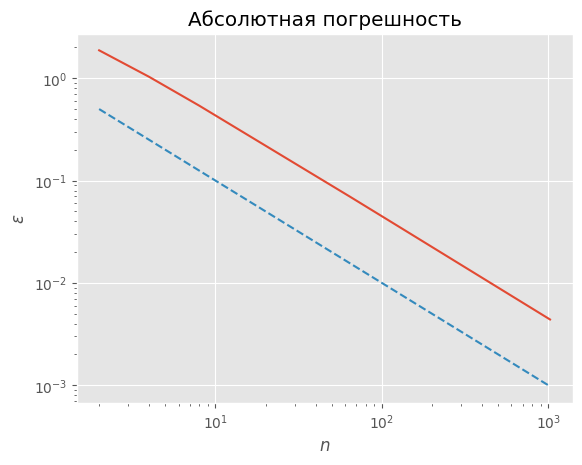

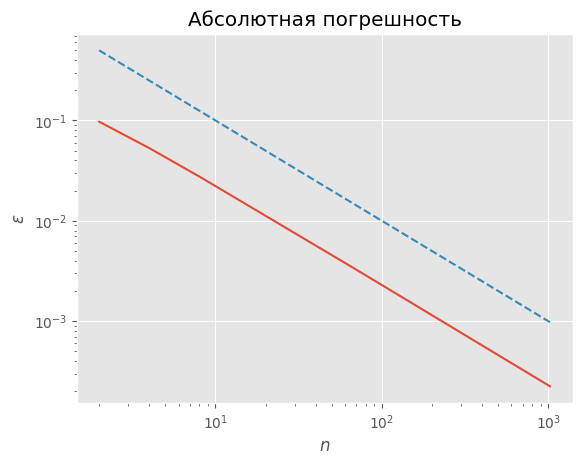

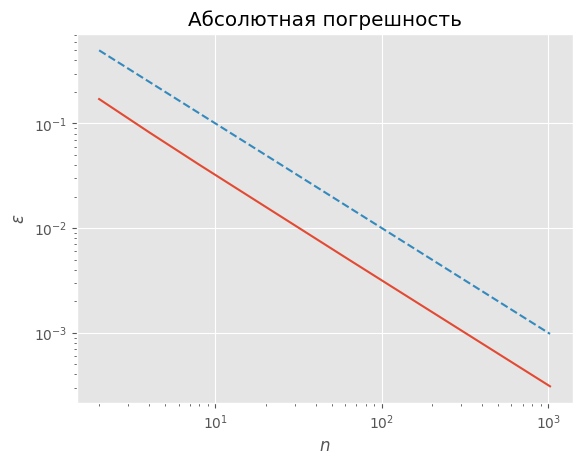

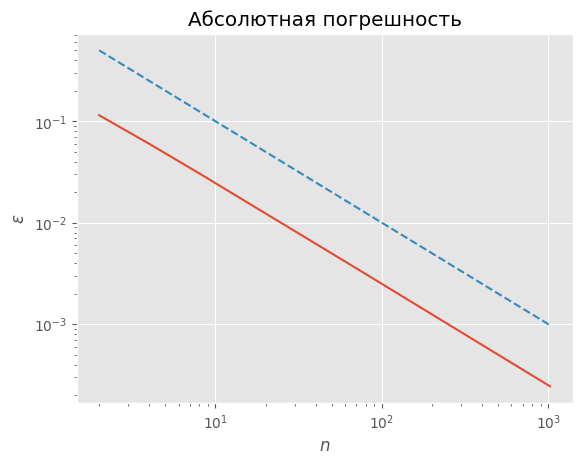

In [13]:
for i in range(len(result_rect)):
    plt.plot(n,np.abs(itg[i]-result_rect[i]))
    plt.plot(n,1/n**1.0,'--') #строим кривую обратно пропорциональную числу разбиений для оценки порядка точности метода
    plt.title("Абсолютная погрешность")
    plt.xscale("log")
    plt.yscale("log")
    plt.xlabel("$n$") # подписиваем ось x
    plt.ylabel("$\epsilon$") # подписываем ось y
    plt.show()

Реализуем оставшиеся два метода: метод трапеций м метод Симпсона. Метод трапеций:

In [14]:
def integral_trap(f,a,b,n):
    """
    Подпрограмма рассчитывает определенный интеграл от f(x) от a до b.
    Кол-во точек n. Метод трапеции.
    """
    #создаем массив x, состоящий из n интервалов и n+1 точек от a до b
    x = np.linspace(a,b,n+1)
    #накапливаем сумму при интегрировании
    s = 0
    #помним, в операторе for i in range(i1,i2) i изменяется от i1 до i2-1
    for i in range(1,n):
        s = s+f(x[i])
    s = s+0.5*f(x[0])
    s = s+0.5*f(x[n])
    dx = (b-a)/n
    s = s*dx
    return s

In [15]:
value_trap = np.zeros(n.size)
result_trap = []

for func in funcs:
    for j in range(n.size): 
        value_trap[j] = integral_trap(func,0.0,1.0,n[j])
    result_trap.append(value_trap.copy())
result_trap = np.array(result_trap)
result_trap

array([[3.375     , 3.09375   , 3.0234375 , 3.00036621, 3.00009155,
        3.00000143],
       [0.82386686, 0.83708375, 0.84037503, 0.84145386, 0.8414667 ,
        0.84147092],
       [0.64523519, 0.63540943, 0.63294342, 0.63213342, 0.63212377,
        0.63212061],
       [0.775     , 0.78279412, 0.78474712, 0.78538799, 0.78539562,
        0.78539812]])

Метод Симпсона:

In [16]:
def integral_simp(f,a,b,n):
    """
    Подпрограмма рассчитывает определенный интеграл от f(x) от a до b.
    Кол-во точек n. Метод Симпсона.
    """
    #создаем массив x, состоящий из n интервалов и n+1 точек от a до b
    x = np.linspace(a,b,n+1)
    #накапливаем сумму при интегрировании
    s = 0
    #помним, в операторе for i in range(i1,i2) i изменяется от i1 до i2-1
    for i in range(1,n,2):
        s = s+4.0*f(x[i])
    for i in range(2,n,2):
        s = s+2.0*f(x[i])
    s = s+f(x[0])
    s = s+f(x[n])
    dx = (b-a)/n
    s = s*dx/3.0
    return s

In [17]:
value_simp = np.zeros(n.size)
resullt_simp = []
for func in funcs:
    for j in range(n.size): 
        value_simp[j] = integral_simp(func,0.0,1.0,n[j])
    resullt_simp.append(value_simp.copy())
resullt_simp = np.array(resullt_simp)
resullt_simp

array([[3.        , 3.        , 3.        , 3.        , 3.        ,
        3.        ],
       [0.84177209, 0.84148938, 0.84147213, 0.84147099, 0.84147098,
        0.84147098],
       [0.63233368, 0.63213418, 0.63212141, 0.63212056, 0.63212056,
        0.63212056],
       [0.78333333, 0.78539216, 0.78539813, 0.78539816, 0.78539816,
        0.78539816]])

Интересно отметить, что для данного выражения, т.е. интеграла от кубического выражения, метод Симпсона дает абсолютно точное значение. Как вы можете объянить данный факт? 
В заключении построим зависимость погрешности от $\Delta x$.

<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\D'
<>:9: SyntaxWarning: invalid escape sequence '\e'
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1318949898.py:8: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta x$") # подписиваем ось x
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1318949898.py:9: SyntaxWarning: invalid escape sequence '\e'
  plt.ylabel("$\epsilon$") # подписываем ось y


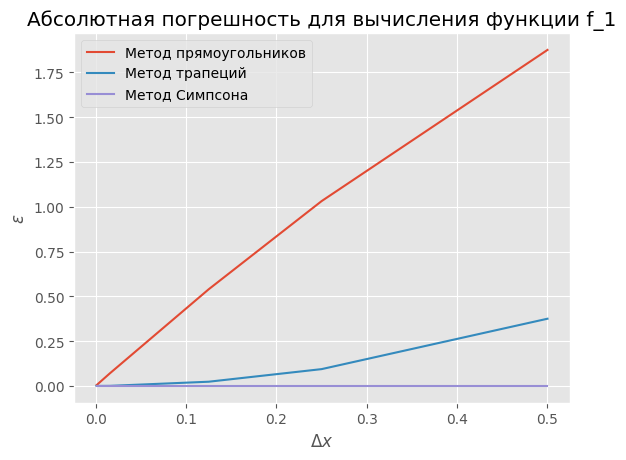

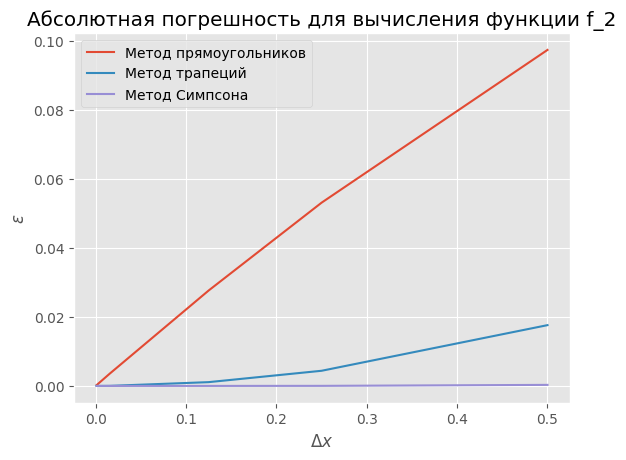

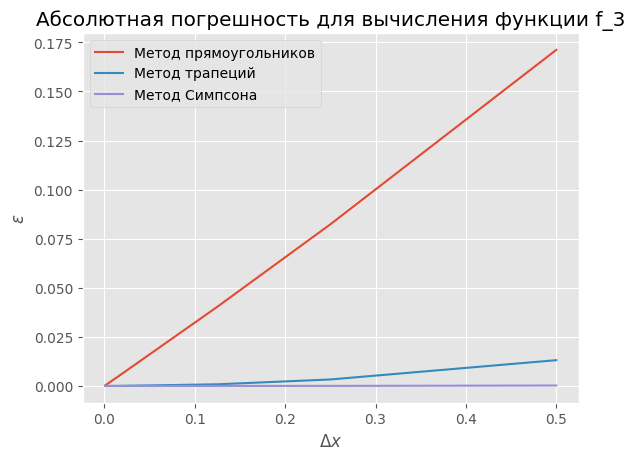

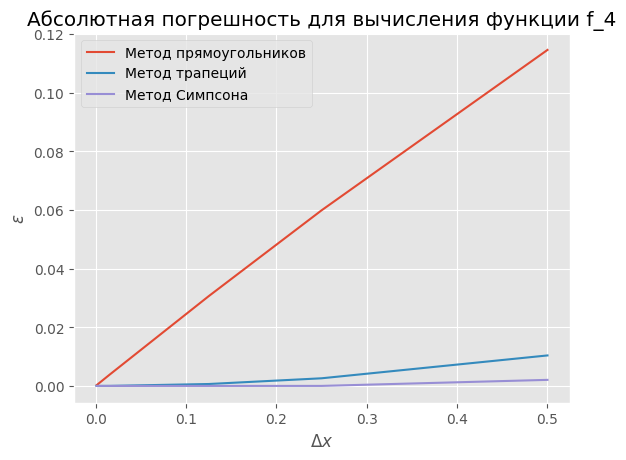

In [18]:
#График в обычном масштабе
for i in range(len(result_rect)):
    plt.plot((b-a)/n,np.abs(itg[i]-result_rect[i]),label="Метод прямоугольников")
    plt.plot((b-a)/n,np.abs(itg[i]-result_trap[i]),label="Метод трапеций")
    plt.plot((b-a)/n,np.abs(itg[i]-resullt_simp[i]),label="Метод Симпсона")
    plt.title(f"Абсолютная погрешность для вычисления функции f_{i+1}")
    plt.legend()
    plt.xlabel("$\Delta x$") # подписиваем ось x
    plt.ylabel("$\epsilon$") # подписываем ось y
    plt.show()

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:6: SyntaxWarning: invalid escape sequence '\D'
<>:11: SyntaxWarning: invalid escape sequence '\D'
<>:12: SyntaxWarning: invalid escape sequence '\e'
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1141614077.py:5: SyntaxWarning: invalid escape sequence '\D'
  plt.plot((b-a)/n,((b-a)/n)**1.0,'--b',label="$ \Delta x$")
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1141614077.py:6: SyntaxWarning: invalid escape sequence '\D'
  plt.plot((b-a)/n,((b-a)/n)**2.0,'--g',label="$ \Delta x ^2$")
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1141614077.py:11: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("$\Delta x$") # подписиваем ось x
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\1141614077.py:12: SyntaxWarning: invalid

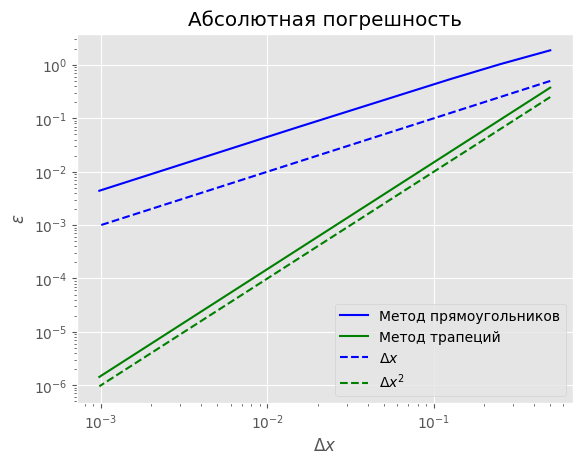

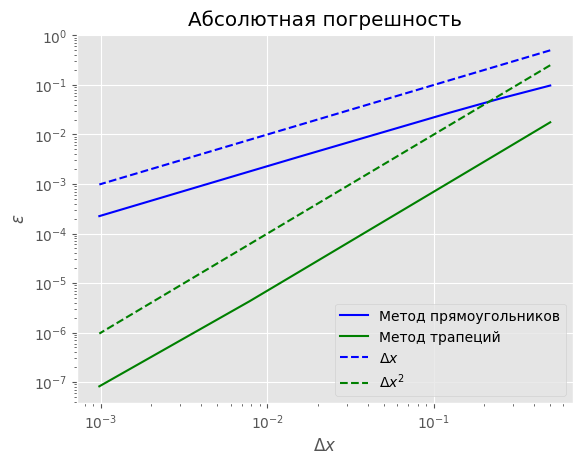

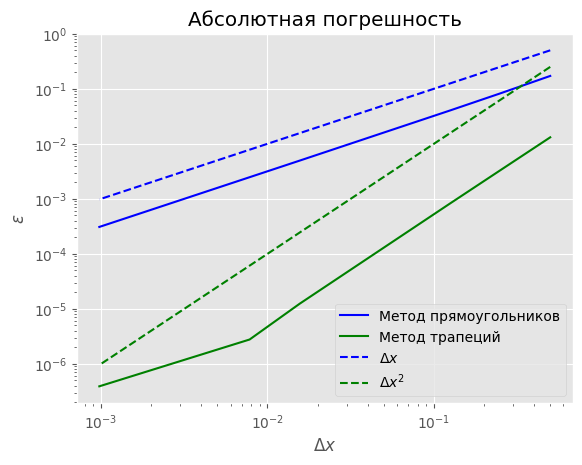

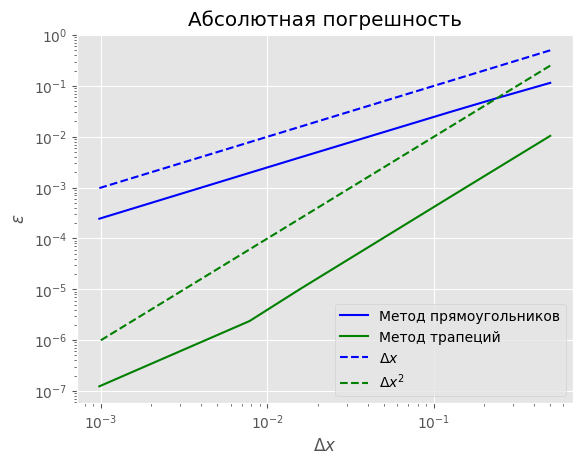

In [19]:
#График в логарифмическом масштабе
for i in range(len(result_rect)):
    plt.plot((b-a)/n,np.abs(itg[i]-result_rect[i]),'-b',label="Метод прямоугольников")
    plt.plot((b-a)/n,np.abs(itg[i]-result_trap[i]),'-g',label="Метод трапеций")
    plt.plot((b-a)/n,((b-a)/n)**1.0,'--b',label="$ \Delta x$")
    plt.plot((b-a)/n,((b-a)/n)**2.0,'--g',label="$ \Delta x ^2$")
    plt.title("Абсолютная погрешность")
    plt.legend()
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("$\Delta x$") # подписиваем ось x
    plt.ylabel("$\epsilon$") # подписываем ось y
    plt.show()

## Работа с массивами NumPy
Вышеописанные процедуры явно реализуют перебор элементов массива. Данный способ явялется наглядным, однако он не использует преимущества библиотеки NumPy. Рассмотрим иную реализацию метода Симпсона:

In [20]:
def integral_simp_numpy(f,a,b,n):
    """
    Подпрограмма рассчитывает определенный интеграл от f(x) от a до b.
    Кол-во точек n. Метод Симпсона.
    """
    #создаем массив x, состоящий из n интервалов и n+1 точек от a до b
    x = np.linspace(a,b,n+1)
    #накапливаем сумму при интегрировании
    s = 0
    s = 4.0*np.sum(f(x[1:n:2]))
    s = s + 2.0*np.sum(f(x[2:n:2]))
    s = s + f(x[0])
    s = s + f(x[n])
    dx = (b-a)/n
    s = s*dx/3.0
    return s

При разбиении на 1024 интервала:

In [21]:
value_simp_numpy = []

for func in funcs:
    res = integral_simp_numpy(func,0.0,1.0,1024)
    value_simp_numpy.append(res)
value_simp_numpy

[np.float64(3.0),
 np.float64(0.8414709848079007),
 np.float64(0.6321205588285609),
 np.float64(0.7853981633974483)]

Теперь сравним скорость выполнения двух функций при помощи команды %timeit:

In [22]:
#Новая процедура
%timeit value_simp_numpy = integral_simp_numpy(f_1,0.0,1.0,1024)

34.2 μs ± 130 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Пример вывода (зависит от компьютера): 66.5 µs ± 5.74 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
66.5 мкс на 10000 запусков = 6.65 нc на один запуск

In [23]:
#Старая процедура
%timeit value_simp = integral_simp(f_1,0.0,1.0,1024)

432 μs ± 3.13 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Пример вывода (зависит от компьютера): 645 µs ± 67.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
645 мкс на 1000 запусков = 645 нc на один запуск

Если опираться на примеры вывода, то новая реализация примерно в 100 раз быстрее.

Мы видим, что старая процедура с явным перебором выполняется на порядок медленее! В настоящем курсе мы будем концентрироваться на идеях, а не на производительности. Поэтому Вы можете использовать любой подходящий для Вас вариант.
Итак, мы практически выполнили задание №1. Ваша задача - провести вычисление оставшихся интегралов, используя уже написанный код.

## Численное интегрирование многомерных интегралов
В различных задачах встречается усреднение по многим переменным. Например, предположим, что нам известна зависимость от скорости и координаты полной энергии системы десяти взаимодействующих между собой частиц. Поскольку в трехмерном пространстве каждая частица имеет по три компоненты скорости и координаты, то полная энергия является функцией 60 переменных. Следовательно, для расчета средней энергии, приходящейся на частицу, требуется вычислять N = 60-мерный интеграл. Если разделить область изменения каждой координаты на p отрезков, то в данном случае потребуется вычислять сумму по $p^{60}$ точкам. Совершенно очевидно, что для больших значений N применять обычные численные методы нельзя; тем не менее стандартные методы все еще используются для N = 2–5. Дополнительное усложнение в вычислении N-мерных интегралов вносит трудность определения N-1 пределов интегрирования. По сравнению с этим границы одномерного интеграла представляются двумя числами: верхним и нижним пределами.
Простейшим методом оценки многомерных интегралов заключается в сведении этих интегралов к произведению одномерных интегралов. Данный метод эффективен в случае простых пределов интегрирования и гладких подинтегральных функций. Проиллюстрируем метод на примере двойного интеграла вида
$$
F=\int\limits_{{{x}_{1}}}^{{{x}_{2}}}{\int\limits_{{{y}_{1}}(x)}^{{{y}_{2}}(x)}{f(x,y)dydx}} \tag{8}
$$
Область интегрирования определяется нижним и верхним переделами y при данном значении x, обозначенными y1(x) и y2(x), и нижним и верхним пределами x, обозначенными x1 и x2. Определим функцию g(x) как внутренний интеграл по переменной y:
$$
g(x)=\int\limits_{{{y}_{1}}(x)}^{{{y}_{2}}(x)}{f(x,y)dy} \tag{9}
$$
и запишем
$$
F=\int\limits_{{{x}_{1}}}^{{{x}_{2}}}{g(x)dx} \tag{10}
$$


## Задание №2
1. Проинтегрируйте функцию $f(x,y)={{x}^{2}}+6xy+{{y}^{2}}$ по области, определяемой условием ${{x}^{2}}+{{y}^{2}}\le 1$. Примените метод прямоугольников и выберите число интервалов по каждой переменной равным $n = 2^p$. Используйте p в диапазоне от 2 до 7.
2. Реализуйте метод Симпсона и повторите расчет.
3. Оцените зависимость погрешности от n в п.п. 1 и 2, используя различные значения p.

## Программа для взятия двойного интеграла
Для ознакомления с языком Python в настоящем разделе представлено описание программы для взятия двойного интегралла методом прямоугольников и методом Симпсона.

In [24]:
P = np.array([2, 3, 4, 5, 6, 7, 8])

In [25]:
def f_xy(x,y):
    """функция возвращает значения функции x^2+6xy+y^2"""
    return x**2.0+6.0*x*y+y**2.0

In [26]:
def a_bound(x):
    return -(1.0-x**2.0)**0.5
def b_bound(x):
    return (1.0-x**2.0)**0.5

In [27]:
def integral_simp2(f,a,b,c,d,n):
    """
    Вычисляем значение двойного интеграла по формуле Симпсона
    """
    def g(x):
        def f_y(y):
            return f(x,y)
        return integral_simp(f_y,a(x),b(x),n)
    return integral_simp(g, c, d, n)

In [28]:
res_simp2 = []
for p in P:
    val = integral_simp2(f_xy,a_bound,b_bound,-1.0,1.0,2**p)
    res_simp2.append(val)
res_simp2

[np.float64(1.3769227606014738),
 np.float64(1.508600445760991),
 np.float64(1.5497269286981747),
 np.float64(1.5634905742117293),
 np.float64(1.5682369337845357),
 np.float64(1.5698954536478114),
 np.float64(1.570478514479906)]

In [29]:
def integral_rect2(f, a, b, c, d, n):
    def g(x):
        def f_y(y):
            return f(x,y)
        return integral_simp(f_y,a(x),b(x),n)
    return integral_rect(g, c, d, n)

In [30]:
res_rect2 = []

for p in P:
    val = integral_rect2(f_xy,a_bound,b_bound,-1.0,1.0,2**p)
    res_rect2.append(val)
res_rect2

[np.float64(1.199358737117772),
 np.float64(1.431290018600186),
 np.float64(1.5201177011736777),
 np.float64(1.5526473559522165),
 np.float64(1.564339539326456),
 np.float64(1.568506475067474),
 np.float64(1.569985504626797)]

[  4   8  16  32  64 128 256]


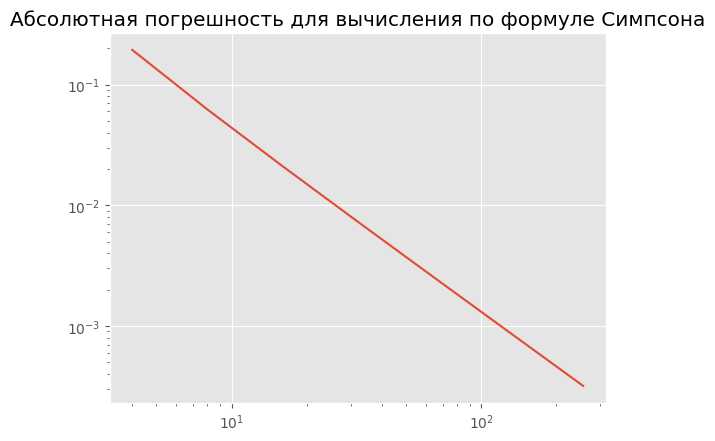

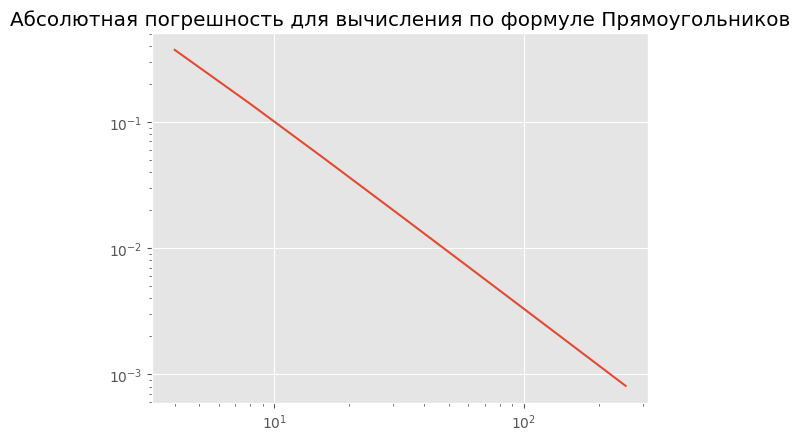

In [31]:
results = [res_simp2, res_rect2]
results_t = ["Симпсона", "Прямоугольников"]
target = np.pi / 2
n = 2**P
err0 = []
print(n)
for i, res in enumerate(results):
    for j in range(len(res)):
        err = abs(target - res[j])
        err0.append(err)
    plt.plot(n, err0) 
    plt.title(f"Абсолютная погрешность для вычисления по формуле {results_t[i]}")
    plt.xscale("log") # подписиваем ось x
    plt.yscale("log") # подписываем ось y
    plt.show()
    err0.clear()

Функция integral_simp2 имеет довольно ясную и наглядную структуру, повторяющую процедуру сведения двойной интегралов к одномерным. Используя написанную функцию Вы можете быстро реализовать функцию интегрирования, основанную на методе прямоугольников и построить зависимость точности интегрирования от количества интервалов разбиения.

## Вычисление интегралов простейшим методом Монте-Карло
Поясним суть метода Монте-Карло.

Вариант 1 (метод “проб и ошибок”). Представим прямоугольник высотой H и длинной b-a, такой, что функция $f(x)$ лежит внутри него. Генерируем n пар случайных чисел $x_i$ и $y_i$, удовлетворяющих условиям $a ≤ x_i ≤ b$ и $0 ≤ y_i ≤ H$. Доля точек ($x_i$, $y_i$), которые удовлетворяют условию $y_i ≤ f({{x}_{i}})$, представляет собой оценку отношения интеграла от функции $f(x)$ к площади прямоугольника. Отсюда оценка ${{F}_{n}}$ в методе “проб и ошибок” определяется выражением
$$
{{F}_{n}}=A\frac{{{n}_{s}}}{n}, \tag{11}
$$
где ${{n}_{s}}$ – число точек, удовлетворяющих условию $y_i ≤ f({{x}_{i}})$, $n$ – общее количество точек, A – площадь прямоугольника. 

Вариант 2 (метод “выборочного среднего”). Другая разновидность метода Монте-Карло основывается на теореме, что интеграл (1) определяется средним значением подынтегральной функции $f(x)$ на отрезке a ≤ x ≤ b. Для вычисления среднего возьмем $x_i$ не с постоянным шагом, а случайно выбранным и произведем выборку значений $f(x)$. Оценка ${{F}_{n}}$ методом “выборочного среднего” выражается формулой
$$
{{F}_{n}}=\left( b-a \right)\left\langle f \right\rangle =\left( b-a \right)\frac{1}{n}\sum\limits_{i=1}^{n}{f\left( {{x}_{i}} \right)}, \tag{12}
$$
где $\left\langle f \right\rangle$ – среднее значение $f$, $x_i$ – случайные числа, равномерно распределенные на отрезке $a ≤ x_i ≤ b$, а n – количество испытаний. Формулы (4) и (12) различаются только тем, что в первой формуле n точек выбираются с постоянным шагом, а во второй – случайным образом. Для одномерных интегралов (4) оказывается точнее, но для многомерных интегралов все же предпочтительнее формула (12).

## Задание №3
1. Составьте программу, которая реализует метод "проб и ошибок" (формула (11)). Найдите оценку ${{F}_{n}}$ интеграла от функции $f(x)=4\sqrt{1-{{x}^{2}}}$ в зависимости от числа испытаний n. Положите $a=0,\ b=1,\ H=1$ и проведите выборку функции $\sqrt{1-{{x}^{2}}}$. Умножьте оценку на 4. Вычислите разность между ${{F}_{n}}$ и точным результатом, равным π. Данная разность является мерой погрешности метода Монте-Карло. Постройте график зависимости погрешности от n в логарифмическом масштабе. Какой будет приблизительная функциональная зависимость погрешности от n при больших значениях n?
2. Оцените интеграл от $f(x)$, используя метод Монте-Карло выборочного среднего (12), и вычислите погрешность как функцию от числа испытаний n для значений n до 10000. Определите приблизительную функциональную зависимость погрешности от n для больших значений n. Сколько необходимо провести испытаний, что получить ${{F}_{n}}$ с точностью до двух десятичных знаков?

## Наброски программы для задания №3
В настоящем разделе представлены основные этапы реализации программ для решения заданий из пунка №3.

In [32]:
a, b, H = 0.0, 1.0, 1.0 #инициализируем начальные парараметры
npoint = 100
#определеяем функцию для расчета f(x)
def func(x):
    return (1.0-x**2.0)**0.5
np.random.seed() #инициализируем датчик случайных чисел
xi = np.random.uniform(a,b,npoint)
yi = np.random.uniform(0.0,H,npoint)

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
C:\Users\andre\AppData\Local\Temp\ipykernel_12252\2528703624.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(xspace,func(xspace),'-g',label='$-\sqrt{1-x^2}$')


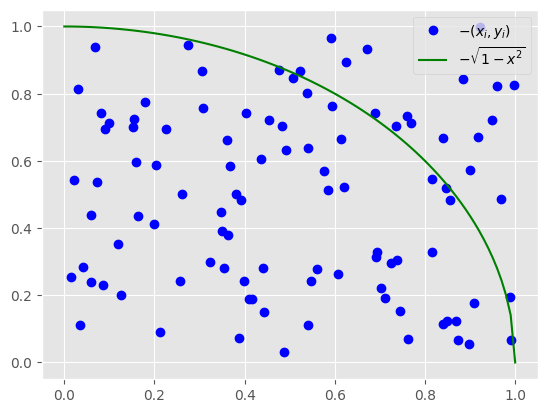

In [33]:
#вывод графика функции и точек
plt.plot(xi,yi,'ob',label='$-(x_i,y_i)$')
xspace = np.linspace(a,b,101)
plt.plot(xspace,func(xspace),'-g',label='$-\sqrt{1-x^2}$')
plt.legend()
plt.show()

Смысл метода Монте-Карло: отношение площади под фигурой к площади прямоугольника равно отношению равномерно распределенных точек, оказавшихся под фигурой к общему числу точек. Реализацию первого подхода завершает нахождение данного отношения:

In [34]:
#создаем массив для которого выполняется
#условие в [] и запоминаем его размер
nin = yi[yi<=func(xi)].size 
nin

82

Суммарная площадь равна $0.75\cdot 1 = 0.75$. Окончательно оценка $f(x)=4\sqrt{1-{{x}^{2}}}=\pi$ получилась равной 3.00.
Проделанные операции могут быть оформлены в виде функции:

In [35]:
def MonteCarlo1(f,a,b,H,npoint):
    np.random.seed(0)
    xi = np.random.uniform(a,b,npoint)
    yi = np.random.uniform(0.0,H,npoint)
    nin = yi[yi<=func(xi)].size
    return nin/npoint*(b-a)*H

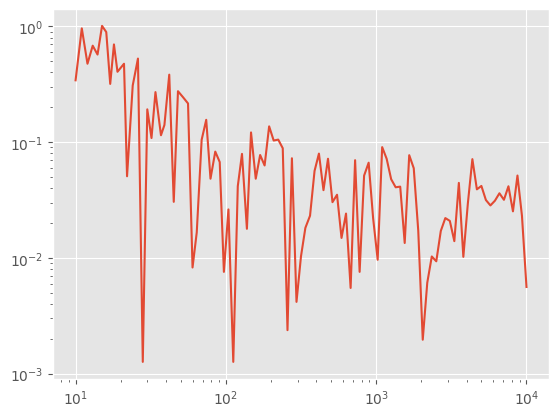

In [36]:
npoint = np.logspace(1,4,101,dtype=int)
value = np.zeros(npoint.size)
error = np.zeros(npoint.size)

for i in range(npoint.size):
    value[i] = 4.0*MonteCarlo1(func,0.0,1.0,1.0,npoint[i]) 
    error[i] = np.pi - value[i]
plt.plot(npoint,np.abs(error))
plt.xscale('log')
plt.yscale('log')
plt.show()

Подпрограмма для расчета пункта 2 задания №3 выглядит как:

In [37]:
def MonteCarlo2(f,a,b, npoint):
    np.random.seed(0)
    xi = np.random.uniform(a,b,npoint)
    yi = f(xi)
    return (b-a)/npoint * np.sum(yi)

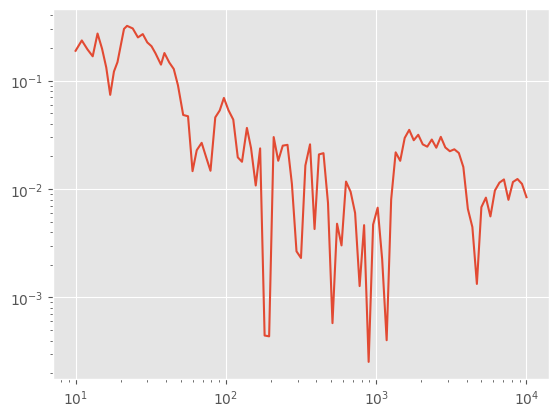

In [38]:
npoint = np.logspace(1,4,101,dtype=int)
value = np.zeros(npoint.size)
error = np.zeros(npoint.size)

for i in range(npoint.size):
    value[i] = 4.0*MonteCarlo2(func,0.0,1.0,npoint[i]) 
    error[i] = np.pi - value[i]
plt.plot(npoint,np.abs(error))
plt.xscale('log')
plt.yscale('log')
plt.show()

Реализованные программы являются основой для выполнения последующих заданий.

## Вычисление многомерных интегралов методом Монте-Карло
Численное интегрирование методом Монте-Карло наиболее эффективно для оценки многомерных интегралов, которые, как правило, не вычисляются обычными численными методами. В качестве примера расчета многомерных интегралов этим методом рассмотрим нахождения центра масс и момента инерции твердых тел. Предположим, что масса распределена непрерывно с известной полностью $\rho \left( x,y \right)$. Тогда полная масса тела равна
$$
M=\iint{\rho \left( x,y \right)dxdy}, \tag{13}
$$
Пределы интегрирования определяются геометрией тела. Координаты центра масс X, Y:
$$
X=\frac{1}{M}\iint{x\rho \left( x,y \right)dxdy}, \tag{14}
$$
$$
Y=\frac{1}{M}\iint{y\rho \left( x,y \right)dxdy}, \tag{15}
$$
Если тело вращается вокруг оси z, то его момент инерции равен
$$
{{I}_{z}}=\iint{\left( {{x}^{2}}+{{y}^{2}} \right)\rho \left( x,y \right)dxdy}, \tag{16}
$$
Вычисление указанных параметров методом выборочного среднего осуществляется просто. Например, обобщение метода выборочного среднего для вычисления момента инерции имеет вид
$$
{{I}_{z,n}}=\left( {{x}_{2}}-{{x}_{1}} \right)\left( {{y}_{2}}-{{y}_{1}} \right)\frac{1}{n}\sum\limits_{i=1}^{n}{\left( {{x}_{i}}^{2}+{{y}_{i}}^{2} \right)}\rho \left( {{x}_{i}},{{y}_{i}} \right), \tag{17}
$$
где ${{I}_{z,n}}$ – оценка ${{I}_{z}}$ для n испытаний, а ${{x}_{i}}$ и ${{y}_{i}}$ – независимые случайные числа на отрезках ${{x}_{1}}\le x\le {{x}_{2}}$ и ${{y}_{1}}\le y\le {{y}_{2}}$.

## Задание №4  

![](03.png)  

**Рисунок 3 – Диск**  
1. Вычислите методом Монте-Карло полную массу, центр масс и момент инерции диска, изображенного на рисунке 3. Внешний радиус диска 4, а радиус круговой полости 1. Центр полости находится на расстоянии a = 1 от центра большего диска. Плотность остальной части этого тела однородна и равна $\rho$ = 1.  
2. Повторите расчета п. 1 при $\rho (x,y)=1+\left( {{x}^{2}}+{{y}^{2}} \right)$, где координаты измеряются относительно центра большего диска.


In [39]:
npoint = 150000
R = 4 # внешний радиус 
r = 1 # радиус полости 
a = 1 # расстояние от центра большого диска до центра полости 
x0 = 0 # координаты центра
y0 = 0

# Плотность диска
def denisty(x, y):
    return 1 + (x**2 + y**2)
def denisty_1(*args):
    return 1 

In [40]:
def M(f, x, y, b, npoint):
    np.random.seed(1)

    # Точки внутри диска 
    xi = np.random.uniform(x, b, npoint)
    yi = np.random.uniform(y, b, npoint)
    
    xi_ = []
    yi_ = []

    for i in range(npoint):
        if ((xi[i])**2 + (yi[i]**2)) <= b**2:
            xi_.append(xi[i])
            yi_.append(yi[i])
            
    xi_ = np.array(xi_)
    yi_ = np.array(yi_)
   
    # Цикл с накоплением суммы и погрешностей 

    sum = 0

    for i in range(len(xi_)):
        sum += f(xi_[i], yi_[i])


    # Cреднее значение функции 
    f_ = 1 / npoint * sum
    
    # Погрешшность
    # err = erroR(f, len(xi), arg) 
    
    # Формула расчета
    mass_disk = (b - x) * (b - y) * f_

    return mass_disk
    
m_disk1 = M(f=denisty_1, x=x0, y=y0, b=R, npoint=npoint)
m_cav1 = M(f=denisty_1, x=x0, y=y0, b=r, npoint=npoint)
mass1 = 4 * (m_disk1 - m_cav1)
m_disk = M(f=denisty, x=x0, y=y0, b=R, npoint=npoint)
m_cav = M(f=denisty, x=x0, y=y0, b=r, npoint=npoint)
mass = 4 * (m_disk - m_cav)
mass1, mass

(47.157199999999996, np.float64(447.83929889991526))

In [41]:
def coord(f, mass, x, y, b, npoint):
    np.random.seed(1)

    # Точки внутри диска 
    xi = np.random.uniform(x, b, npoint)
    yi = np.random.uniform(y, b, npoint)
  
    xi_ = []
    yi_ = [] 

    for i in range(npoint):
        if ((xi[i])**2 + (yi[i]**2)) <= b**2:
            xi_.append(xi[i])
            yi_.append(yi[i])
            
    xi_ = np.array(xi_)
    yi_ = np.array(yi_)
  
    # Приводим подинтегральную функцию к виду (x * f(x, y)) в соответствии с аналитическо записью 
    def func_arg_x(xi, yi):
        return x * f(xi, yi)
    
    def func_arg_y(xi, yi):
        return yi * f(xi, yi)

    sum_x = 0
    sum_y = 0
    # Цикл с накоплением суммы и погрешностей 
    
    for i in range(len(xi_)):
        sum_x += func_arg_x(xi_[i], yi_[i])
        sum_y += func_arg_y(xi_[i], yi_[i])
       
    
    # Cреднее значение функции x
    f_x = 1 / npoint * sum_x
    # Cреднее значение функции y
    f_y = 1 / npoint * sum_y

    # Формула расчета
    X = (b - x) * (b - y) * f_x / mass 
    Y = (b - x) * (b - y) * f_y / mass

    return 4 * X, 4 * Y

X1, Y1 = coord(f=denisty_1, x=x0, y=y0, b=R, npoint=npoint, mass=mass1)
X, Y = coord(f=denisty, x=x0, y=y0, b=R, npoint=npoint, mass=mass)
X1, Y1, X, Y

(0.0,
 np.float64(1.8110668388055968),
 np.float64(0.0),
 np.float64(2.0210688189363513))

In [42]:
def I(f, x, y, b, npoint):
    np.random.seed(1)

    # Точки внутри диска 
    xi = np.random.uniform(x, b, npoint)
    yi = np.random.uniform(y, b, npoint)
    # Для удобства запишем xi и yi в массив и транспонируем его для представления в виде (xi, yi) попарно
    
    xi_ = []
    yi_ = [] 

    for i in range(npoint):
        if ((xi[i])**2 + (yi[i]**2)) <= b**2:
            xi_.append(xi[i])
            yi_.append(yi[i])

    # Cчетчик для подсчета суммы результатов функции
    sum = 0
    
    # Приводим подинтегральную функцию к виду (x^2 + y^2) * f(x, y) в соответствии с аналитическо записью 
    def func_arg(xi, yi):
        return xi**2 + yi**2 * f(xi, yi)
    
    # Цикл с накоплением суммы и погрешностей 
    for i in range(len(xi_)):
        sum += func_arg(xi_[i], xi_[i])

    # Среднее значений функций
    f_ = 1 / npoint * sum


    # Формула расчета 
    moment = (b - x) * (b - y) * f_
    
    return moment

moment1 = 4 * I(f=denisty_1, x=x0, y=y0, b=R, npoint=npoint)
moment1
moment = 4 * I(f=denisty, x=x0, y=y0, b=R, npoint=npoint)
moment1, moment

(np.float64(401.9211672718088), np.float64(3619.3318367830966))

## Анализ погрешности метода Монте-Карло
Пусть требуется найти интеграл I:
$$
I(f) = \iiint _V f(P)dx_1dx_2...dx_N,\ P = {x_1, x_2, ... x_N}\tag{19}
$$
Рассмотрим случчайную величину
$$
\left\langle f \right\rangle =\frac{1}{n}\sum\limits_{i=1}^{n}{f\left( {{P}_{i}} \right)},\tag{20}
$$
При больших n с вероятностью 0.95, выполняется неравенство
$$
|\left\langle f \right\rangle - I(x)|\leq 1.96 \sqrt{D/n},\tag{21}
$$
Величину D можно оценить
$$
{D}\simeq\left\langle {{f}^{2}} \right\rangle -{{\left\langle f \right\rangle }^{2}},\tag{22}
$$
где
$$
\left\langle {{f}^{2}} \right\rangle =\frac{1}{n}\sum\limits_{i=1}^{n}{f{{\left( {{x}_{i}} \right)}^{2}}}\tag{23}
$$

## Задание №5
Написать универсальную программу для вычисления интеграла от заданной функции по единичному кубу в n-мерном пространстве с заданной погрешностью $\varepsilon$.

Пример функции.
$$
I(f) = \iiint _V sin(x^2 _1+x^2 _2+x^2 _3+x^2 _4+x^2 _5+x^2 _6)dx_1dx_2dx_3dx_4dx_5dx_6, \tag{24}
$$
где
$$
x_i \in [0, 1], i = 1,2 ... 6
$$

In [152]:
# Зададим количество аргументов в функции
k = 6
# Левая граница
a = 0
# Правая граница  
b = 1

def func(args: np.array):
    return np.sin(np.sum(args**2))

def func_zad(args):
    ch = args[:3]
    zn = args[3:]
    res = np.sin(np.sum(ch)) / (1 + np.sum(zn**2))
    # print(f'значения {args},\n числитель {ch},\n знаменатель {zn},\n результат {res}')
    return res

def integral(f, b, a, k, eps, n_max):
    # Зададим начальное значение n 
    n = 100

    # Зададим пустой массив, который будет содержать переменные xi
    proiz = np.prod(b - a)
    
    # Зададим начальную погрешность 
    err = float('inf')

    sum = 0
    sum2 = 0
    total = 0

    # Пока погрешность меньше заданной и n < n max
    while err > eps and total < n_max:
        block = min(n, n_max - total)
        
        # Будем создавать массив из n эллементов, каждый элемент - 6 случайных значений от 0 до 1, (Пример): np.array[0.00468322, 0.06369011, 0.09440163, 0.98193234, 0.06244375, 0.98794127]
        for _ in range(block):
            xi_n = np.random.uniform(a, b, k)
            fu = f(xi_n)
            sum += fu
            sum2 += fu**2
        total += block
        
        func_mean =  sum / total
        func2_mean = sum2 / total

        I = proiz / total * sum

        err = 1.96 * ((func2_mean - func_mean**2) / total)**0.5
        
        n = min(n * 2, n_max // 2)

    return I, err, n

I, err, n = integral(f=func_zad, b=b, a=a, k=k, eps=0.00001, n_max=10**6)
I, err, n
        

(np.float64(0.47128701520087835), np.float64(0.0002981726213416557), 500000)